In [118]:
import numpy as np
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore")

## Visualize a 1 dimensional logistic Regression

In [102]:
# Generate classification data
np.random.seed(0)
x_class0 = np.random.normal(2.2, 0.18, 50)  # Class 0
x_class1 = np.random.normal(4.8, 0.2, 50)  # Class 1
X_train = np.concatenate([x_class0, x_class1]).reshape(-1, 1) # Concatenate both classes
y_train = np.array([1] * 50 + [0] * 50)

In [103]:
# Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Create data for the visualization of the sigmoid curve
X_test = np.linspace(1, 6, 100).reshape(-1, 1)
y_test_probs = model.predict_proba(X_test)[:, 1]
decision_boundary = (-model.intercept_ / model.coef_).item()

# Create data for the background color
x_min, x_max = X_test.min() - 0.5, X_test.max() + 0.5
y_min, y_max = -3, 3.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
Z = model.predict_proba(xx.reshape(-1, 1))[:, 1]
Z = Z.reshape(xx.shape)

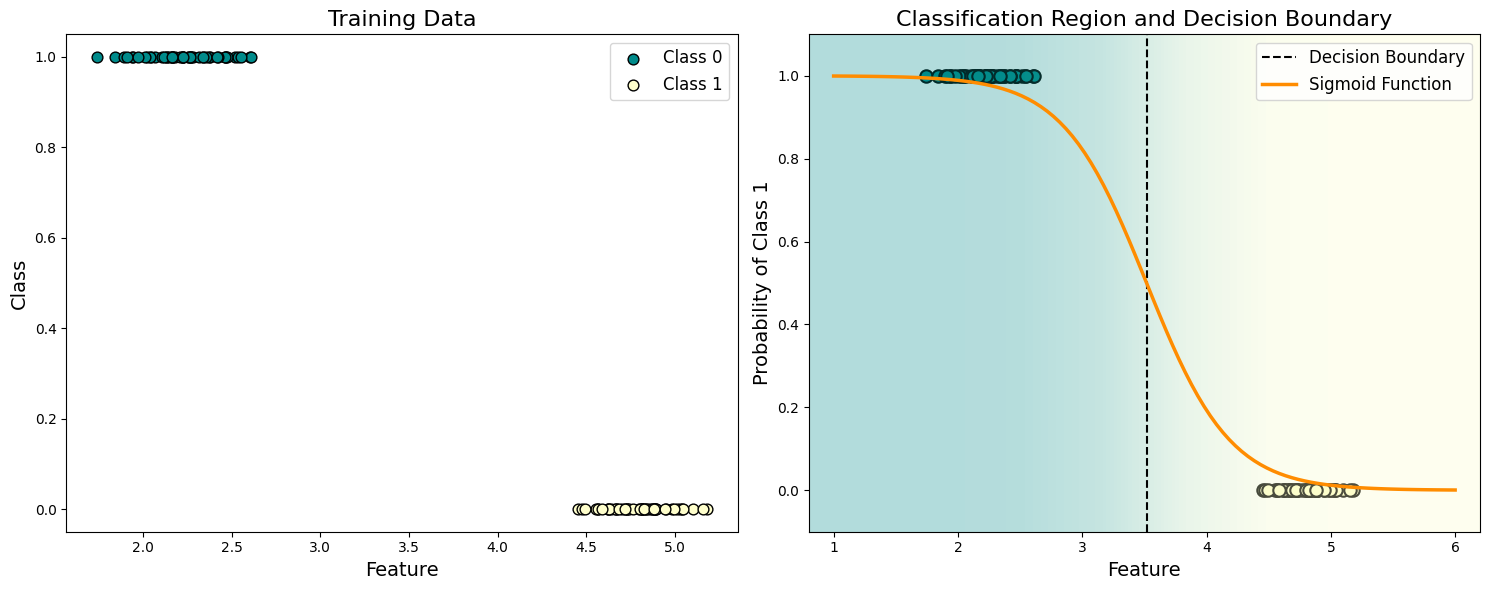

In [105]:
# Colors
color_class0 = '#ffffcc'  
color_class1 = '#008B8B'   
cmap_prob = LinearSegmentedColormap.from_list('custom_cmap', [color_class0, color_class1])

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------------------------
# Training data plot
axs[0].scatter(x_class0, [1] * len(x_class0), color=color_class1, label='Class 0', s=60, edgecolor='k')
axs[0].scatter(x_class1, [0] * len(x_class1), color=color_class0, label='Class 1', s=60, edgecolor='k')
axs[0].set_xlabel('Feature', fontsize=14)
axs[0].set_ylabel('Class', fontsize=14)
axs[0].set_title('Training Data', fontsize=16)
axs[0].legend(fontsize=12)
# -------------------------------------------------

# Decision region and sigmoid plot
axs[1].scatter(x_class0, [1] * len(x_class0), color=color_class1, s=80, edgecolor='k', linewidth=1.5)
axs[1].scatter(x_class1, [0] * len(x_class1), color=color_class0, s=80, edgecolor='k', linewidth=1.5)

# Contour plot for decision regions
axs[1].contourf(xx, yy, Z, levels=50, cmap=cmap_prob, alpha=0.3)

# Plot decision boundary
axs[1].axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary')

# Plot sigmoid curve
axs[1].plot(X_test, y_test_probs, color='darkorange', linewidth=2.5, label='Sigmoid Function')

# Set labels and title for classification region plot
axs[1].set_xlabel('Feature', fontsize=14)
axs[1].set_ylabel('Probability of Class 1', fontsize=14)
axs[1].set_title('Classification Region and Decision Boundary', fontsize=16)
axs[1].legend(fontsize=12)
axs[1].set_xlim(x_min + 0.3, x_max - 0.3)
axs[1].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

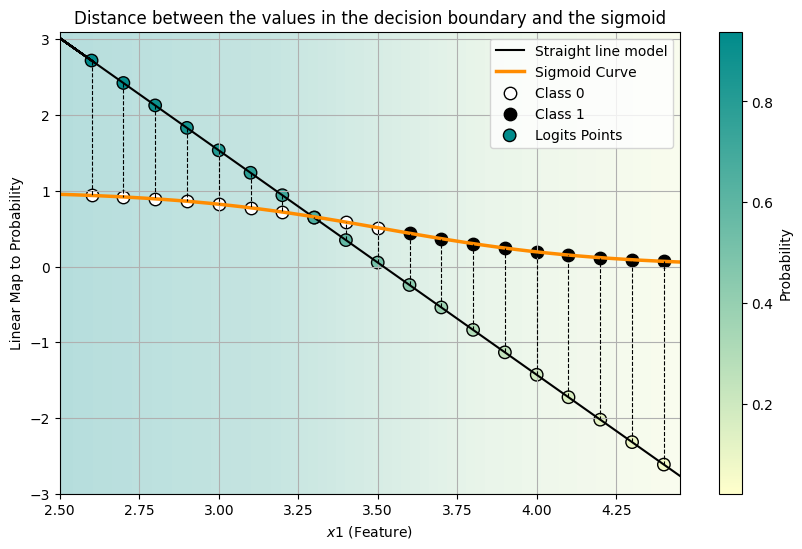

In [106]:
plt.figure(figsize=(10, 6))

# Plot the decision boundary line
plt.plot(X_train, (X_train * model.coef_ + model.intercept_), color='black', label='Straight line model')

# Plot the sigmoid curve
plt.plot(X_test, y_test_probs, color='darkorange', linewidth=2.5, label='Sigmoid Curve')

# Color regions according to the decision boundary
plt.contourf(xx, yy, Z, levels=50, cmap=cmap_prob, alpha=0.3)

# New test data to visualize the classification mapping
X_test = np.arange(2.6, 4.9, 0.1).reshape(-1, 1)
probs = model.predict_proba(X_test)[:, 1]

# Plot the new test data points
plt.scatter(X_test[probs > 0.5], probs[probs > 0.5], c='white', edgecolor='k', s=80, label='Class 0')
plt.scatter(X_test[probs <= 0.5], probs[probs <= 0.5], c='black', edgecolor='k', s=80, label='Class 1')
#plt.scatter(X_test, probs, c=np.where(y_test_probs > 0.5, 'black', 'white'), edgecolor='k', s=80, label='Sigmoid Points')

# Decision boundary line
decision_values = (X_test * model.coef_ + model.intercept_).flatten()

# Color the decision boundary points according to their probabilities
plt.scatter(X_test, decision_values, c=probs, cmap=cmap_prob, edgecolor='k', s=80, label='Logits Points')

# Graficar la distancia entre cada punto en la recta de decisión y la sigmoide
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [decision_values[i], probs[i]], 'k--', lw=0.8)

# Plot settings
plt.xlim(2.5, 4.45)
plt.ylim(y_min, y_max)
plt.xlabel('$x1$ (Feature)')
plt.ylabel('Linear Map to Probability')
plt.title('Distance between the values in the decision boundary and the sigmoid')
plt.legend()
plt.grid(True)
plt.colorbar(label='Probability')  # Add Probability bar
plt.show()

### Plot the sigmoid curve fit

In [121]:
# X_test data
X_test = np.arange(2.6, 4.6, 0.1).reshape(-1, 1)

# Store the probabilities and coefficients at each iteration
coefs_history = []
probs_history = []

# Loop through each iteration to store the coefficients and predicted probabilities
for i in range(1, model.n_iter_[0] + 1):
    model_h = LogisticRegression(warm_start=True, max_iter=i)
    model_h.fit(X_train, y_train)  # Fit the model for i iterations
    
    # Store predicted probabilities for X_test and coefficients
    probs_history.append(model_h.predict_proba(X_test)[:, 1])
    coefs_history.append([model_h.coef_, model_h.intercept_])
    

<Figure size 1000x600 with 0 Axes>

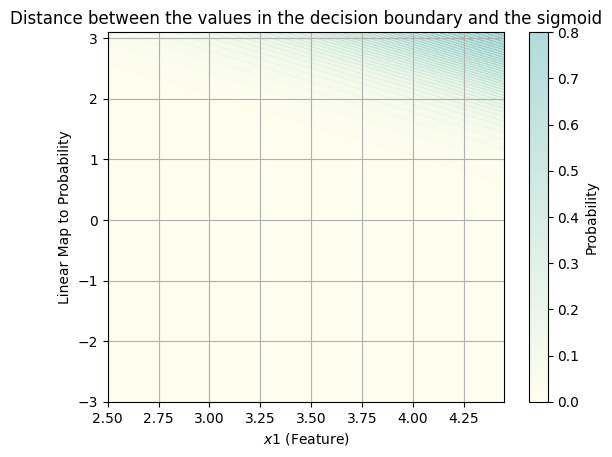

In [124]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
sigmoid_line, = ax.plot([], [], lw=2)

# Plot settings
plt.xlim(2.5, 4.45)
plt.ylim(y_min, y_max)
plt.xlabel('$x1$ (Feature)')
plt.ylabel('Linear Map to Probability')
plt.title('Distance between the values in the decision boundary and the sigmoid')
plt.grid(True)

# Contour plot for the decision boundary
xx, yy = np.meshgrid(np.linspace(2.5, 4.5, 100), np.linspace(y_min, y_max, 100))  # Create grid for contour plot
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)  # Decision boundary
plt.contourf(xx, yy, Z, levels=50, cmap=cmap_prob, alpha=0.3)
plt.colorbar(label='Probability')  # Add color bar for probability

def init():
    sigmoid_line.set_data([], [])
    return sigmoid_line,

def update(epoch):
    # Current probabilities
    prob = probs_history[epoch]
        
    # Update sigmoid line
    sigmoid_line.set_data(X_test, prob)
    return sigmoid_line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=model.n_iter_[0], init_func=init, blit=True, interval=500)
plt.show()

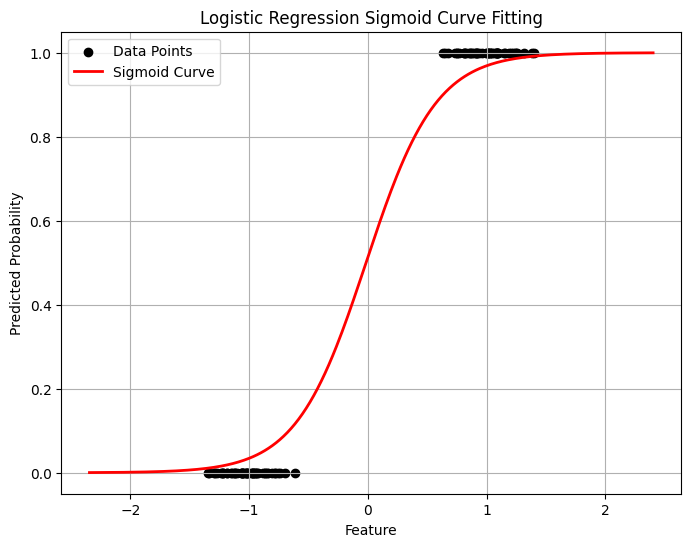

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=0)

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Create a range of values for plotting the sigmoid curve
x_values = np.linspace(X.min() - 1, X.max() + 1, 300).reshape(-1, 1)

# Get the predicted probabilities (sigmoid curve) for each x_value
y_prob = model.predict_proba(x_values)[:, 1]  # Probability for the positive class

# Plot the data points and sigmoid curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Data Points')
plt.plot(x_values, y_prob, color='red', label='Sigmoid Curve', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Sigmoid Curve Fitting')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Plot the sigmoid curve
plt.plot(X_test, y_test_probs, color='darkorange', linewidth=2.5, label='Sigmoid Curve')


# Plot the new test data points
plt.scatter(X_test[probs > 0.5], probs[probs > 0.5], c='white', edgecolor='k', s=80, label='Class 0')
plt.scatter(X_test[probs <= 0.5], probs[probs <= 0.5], c='black', edgecolor='k', s=80, label='Class 1')
#plt.scatter(X_test, probs, c=np.where(y_test_probs > 0.5, 'black', 'white'), edgecolor='k', s=80, label='Sigmoid Points')

# Decision boundary line
decision_values = (X_test * model.coef_ + model.intercept_).flatten()

# Color the decision boundary points according to their probabilities
plt.scatter(X_test, decision_values, c=probs, cmap=cmap_prob, edgecolor='k', s=80, label='Logits Points')

# Graficar la distancia entre cada punto en la recta de decisión y la sigmoide
for i in range(len(X_test)):
    plt.plot([X_test[i], X_test[i]], [decision_values[i], probs[i]], 'k--', lw=0.8)

## Classification with 2 features

In [109]:
# Generate Random classification data with 2 features
np.random.seed(0)
n_points = 100
x1_class0 = np.random.normal(2, 1, n_points)
x2_class0 = np.random.normal(2, 1, n_points)
x1_class1 = np.random.normal(5, 1, n_points)
x2_class1 = np.random.normal(5, 1, n_points)

X = np.vstack((np.column_stack((x1_class0, x2_class0)),
               np.column_stack((x1_class1, x2_class1))))
y = np.hstack((np.zeros(n_points), np.ones(n_points)))

In [110]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [111]:
# Create a grid for the decision boundary
x1_range = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2_range = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx1.shape)

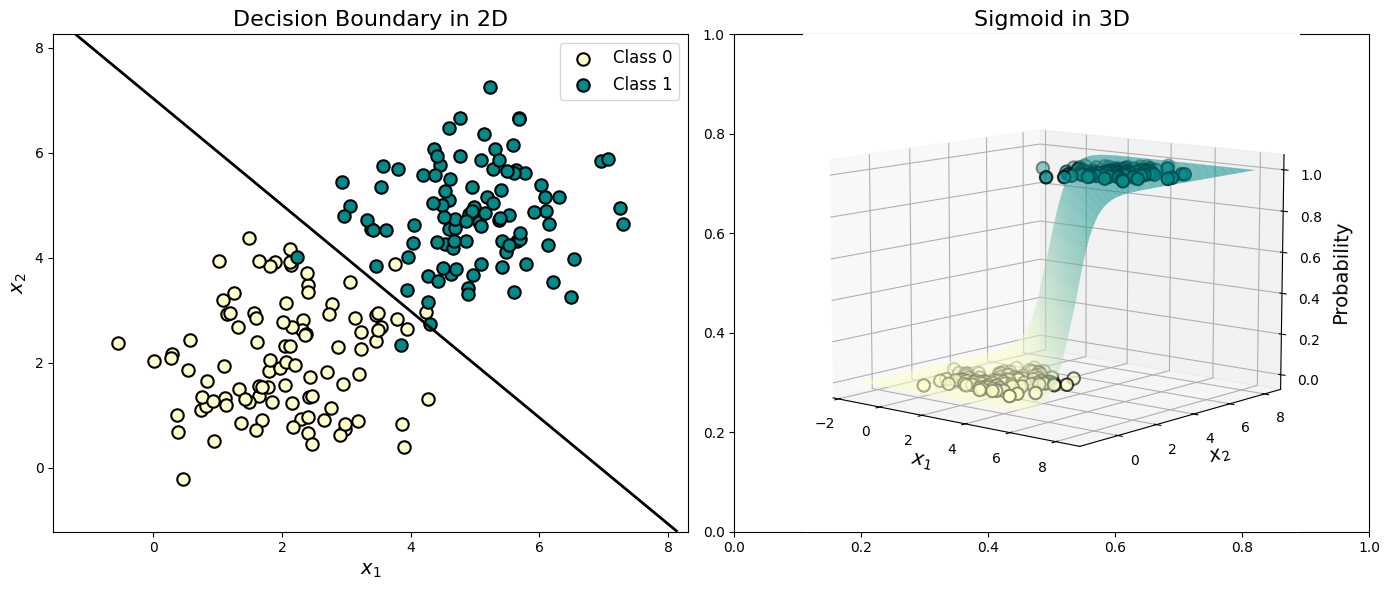

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 2D Plot
ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color=color_class0, label='Class 0', s=80, edgecolor='k', linewidth=1.5)
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color=color_class1, label='Class 1', s=80, edgecolor='k', linewidth=1.5)
ax1.contour(xx1, xx2, probs, levels=[0.5], linewidths=2, colors='black')
ax1.set_xlabel('$x_1$', fontsize=14)
ax1.set_ylabel('$x_2$', fontsize=14)
ax1.legend(fontsize=12)
ax1.set_title('Decision Boundary in 2D', fontsize=16)

# 3D Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[y == 0][:, 0], X[y == 0][:, 1], y[y == 0], color=color_class0, label='Class 0', s=80, edgecolor='k', linewidth=1.5)
ax2.scatter(X[y == 1][:, 0], X[y == 1][:, 1], y[y == 1], color=color_class1, label='Class 1', s=80, edgecolor='k', linewidth=1.5)

# Sigmoid surface
ax2.plot_surface(xx1, xx2, probs, cmap=cmap_prob, alpha=0.6, edgecolor='none')

ax2.set_xlabel('$x_1$', fontsize=14)
ax2.set_ylabel('$x_2$', fontsize=14)
ax2.set_zlabel('Probability', fontsize=14)
ax2.set_title('Sigmoid in 3D', fontsize=16)

# Adjust view angle for better visibility
ax2.view_init(elev=10, azim=-50)

plt.tight_layout()
plt.show()